**Unemployment Analysis with Python**

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.



Download Dataset from https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df1=pd.read_csv("Unemployment in India.csv")
df2=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [ ]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df1.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
df1.shape

(768, 7)

In [ ]:
df1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
#remove leading and trailing spaces from the column names
df1.columns = df1.columns.str.strip()

In [ ]:
df1["Estimated Unemployment Rate (%)"]

,Estimated Unemployment Rate (%)
0,3.65
1,3.05
2,3.75
3,3.32
4,5.17
...,...
763,NaN
764,NaN
765,NaN
766,NaN


<ipython-input-15-4669ec41cabf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Region", data=df1, palette="viridis")  # You can also try "coolwarm", "Blues", "Set2", etc.


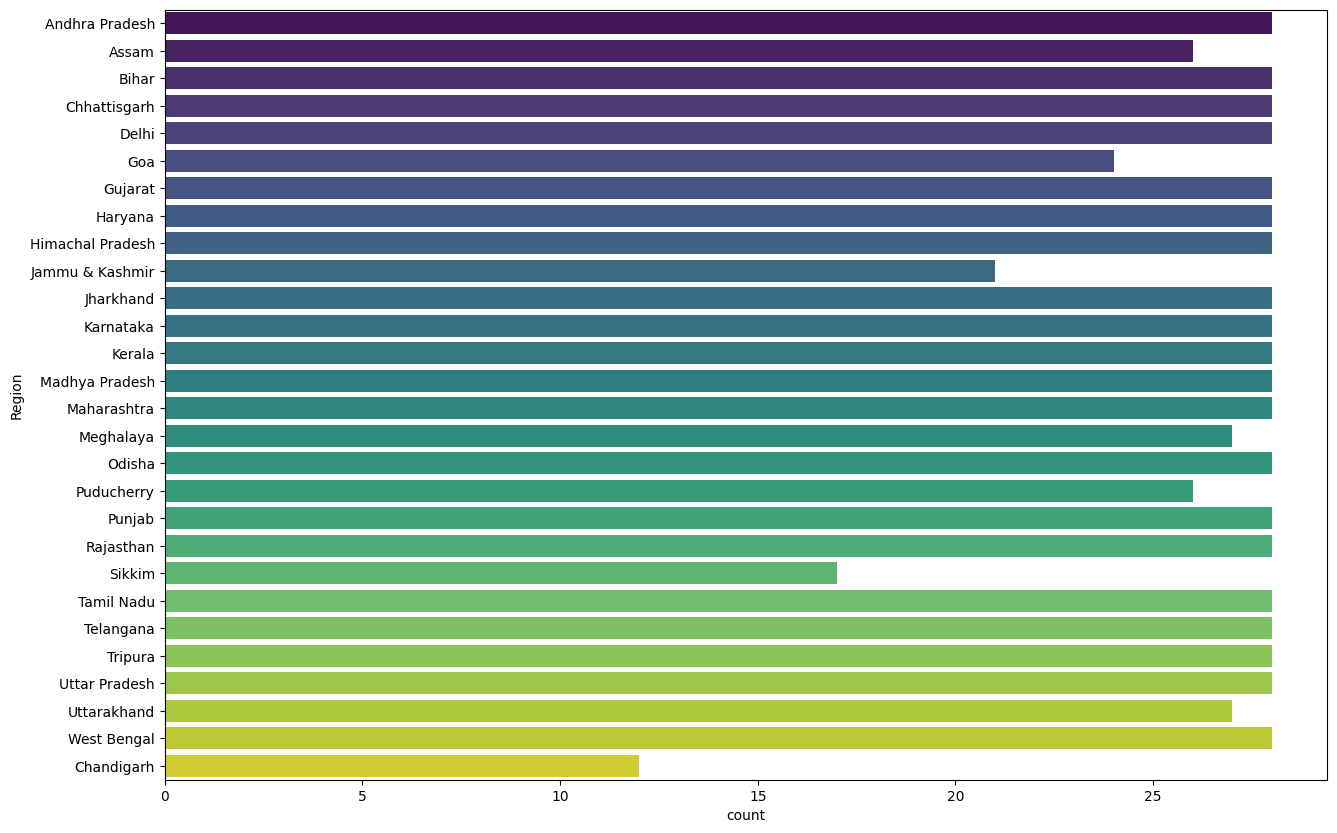

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.countplot(y="Region", data=df1, palette="viridis")  # You can also try "coolwarm", "Blues", "Set2", etc.
plt.show()


In [ ]:
avg_unemployment_rate=df1.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
state_with_highest_unemployment=avg_unemployment_rate.idxmax()
high_unemployment_rate=avg_unemployment_rate.max()
state_with_lowest_unemployment=avg_unemployment_rate.idxmin()
low_unemploy_rate=avg_unemployment_rate.min()
print(f"state  with  high employment : {state_with_highest_unemployment}")
print(f"high employment rate : {high_unemployment_rate}")
print(f"state  with  low employment : {state_with_lowest_unemployment}")
print(f"low employment rate : {low_unemploy_rate}")

state  with  high employment : Tripura
high employment rate : 28.350357142857142
state  with  low employment : Meghalaya
low employment rate : 4.7988888888888885


In [ ]:
avg_unemployment_rate

,Estimated Unemployment Rate (%)
Region,
Andhra Pradesh,7.477143
Assam,6.428077
Bihar,18.918214
Chandigarh,15.991667
Chhattisgarh,9.240357
Delhi,16.495357
Goa,9.274167
Gujarat,6.663929
Haryana,26.283214


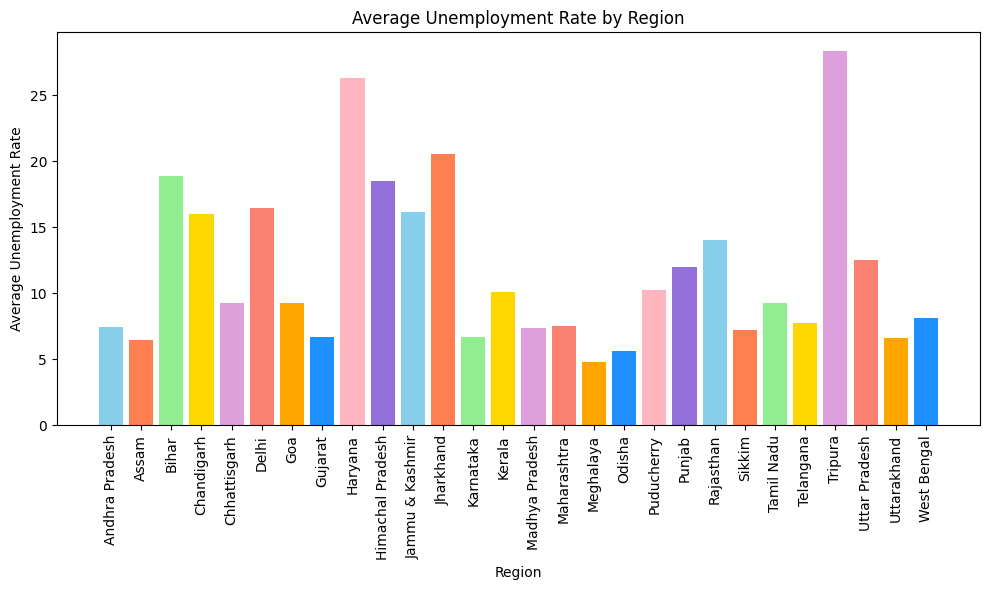

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'regions' and 'avg_rates' are already defined
regions = avg_unemployment_rate.index
avg_rates = avg_unemployment_rate.values

# Define a list of colors, one for each region
colors = ['skyblue', 'coral', 'lightgreen', 'gold', 'plum', 'salmon', 'orange', 'dodgerblue', 'lightpink', 'mediumpurple']

# If there are more regions than colors, this will cycle through the colors
plt.figure(figsize=(10, 6))
plt.bar(regions, avg_rates, color=colors[:len(regions)])
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-20-20bd1578e2df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df1,palette="Set1")


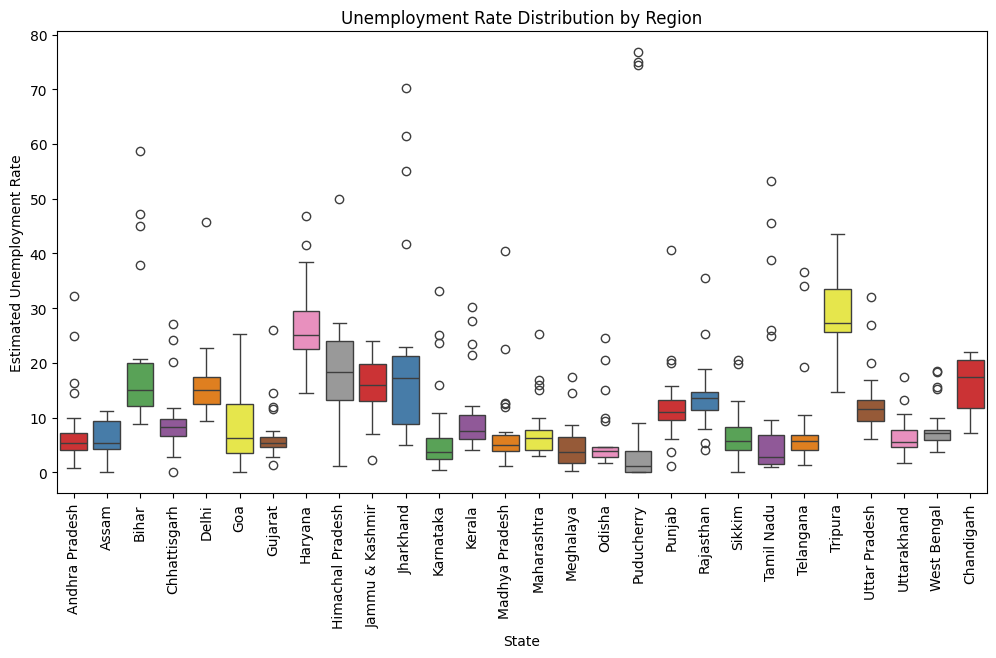

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df1,palette="Set1")
plt.title("Unemployment Rate Distribution by Region")
plt.xlabel("State")
plt.ylabel("Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.show()

<ipython-input-21-6e05ea13ca9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Estimated Labour Participation Rate (%)', data=df1,palette="hsv")


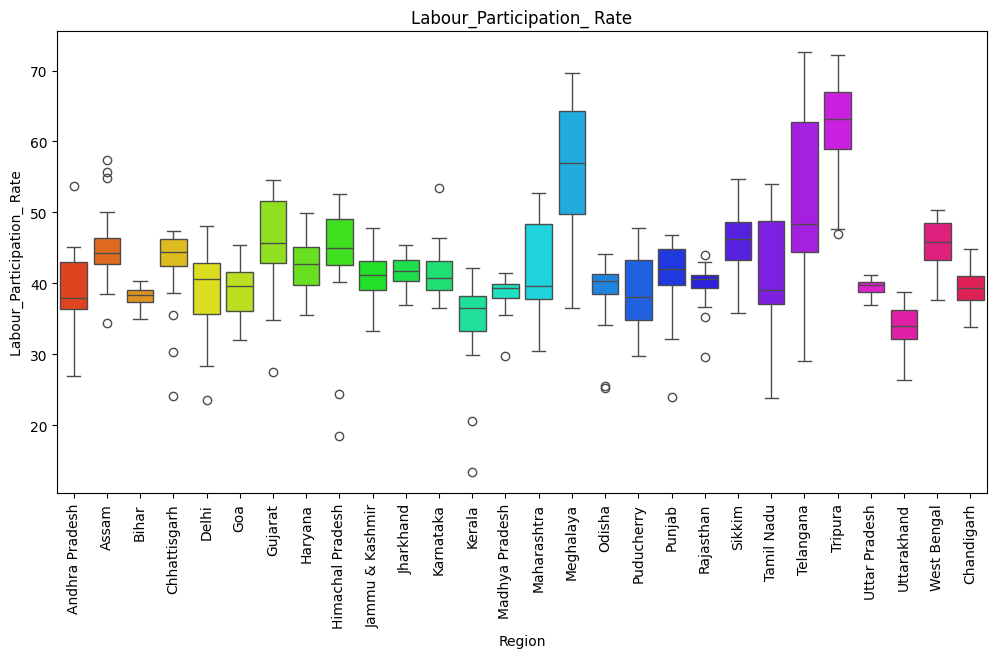

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Labour Participation Rate (%)', data=df1,palette="hsv")
plt.title("Labour_Participation_ Rate")
plt.xlabel("Region")
plt.ylabel("Labour_Participation_ Rate")
plt.xticks(rotation=90)
plt.show()

<ipython-input-22-9e8c9c25a740>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Estimated Employed', data=df1,palette="brg")


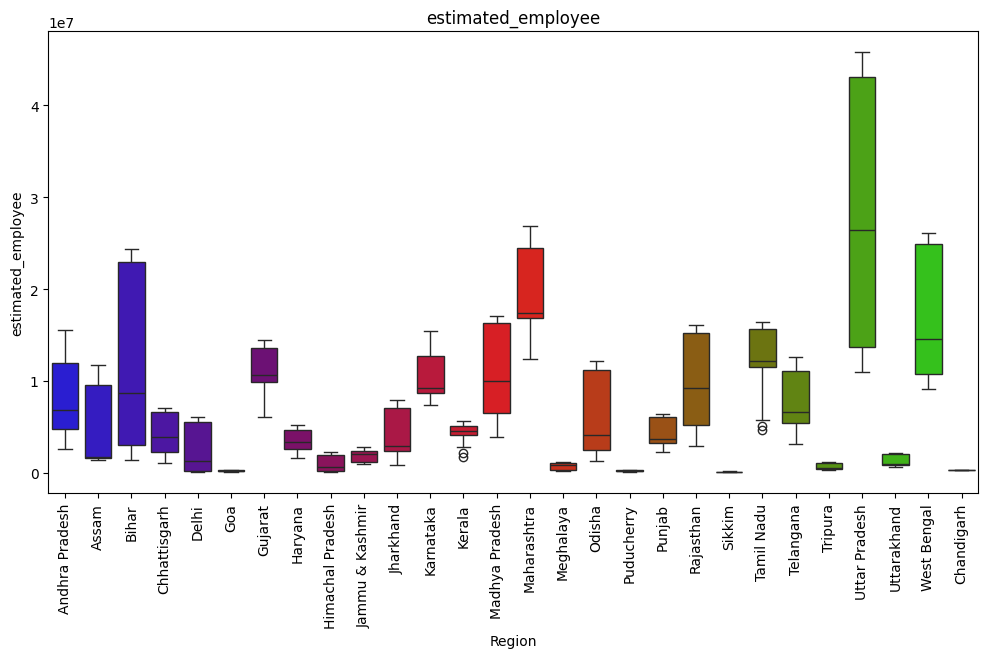

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Employed', data=df1,palette="brg")
plt.title("estimated_employee")
plt.xlabel("Region")
plt.ylabel("estimated_employee")
plt.xticks(rotation=90)
plt.show()

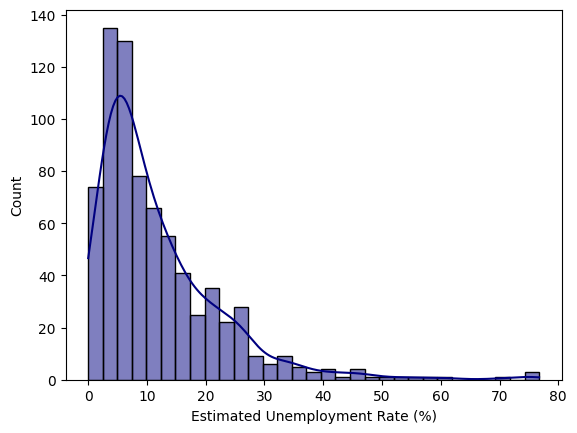

In [ ]:
sns.histplot(data=df1, x="Estimated Unemployment Rate (%)", kde=True,color="navy")
plt.show()

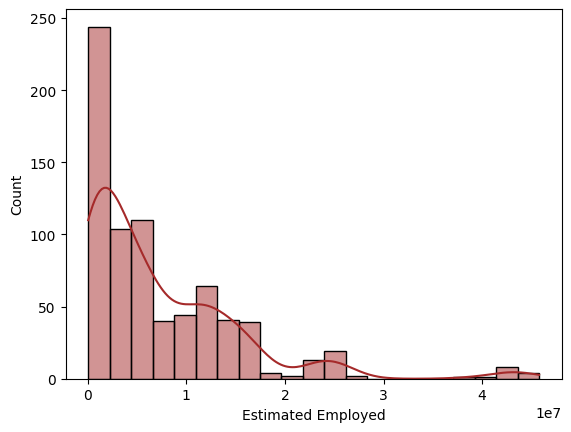

In [ ]:
sns.histplot(data=df1, x="Estimated Employed", kde=True,color="brown")
plt.show()

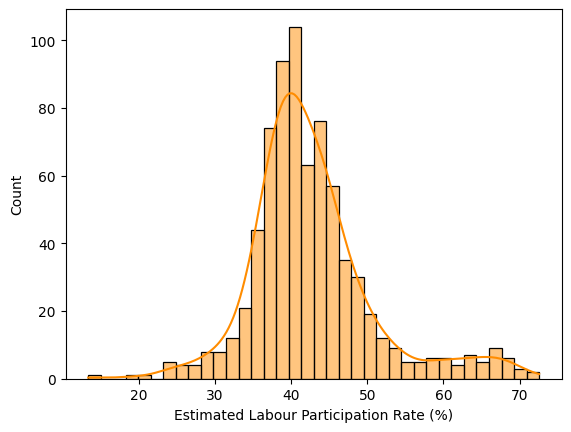

In [ ]:
sns.histplot(data=df1, x="Estimated Labour Participation Rate (%)", kde=True,color="darkorange")
plt.show()


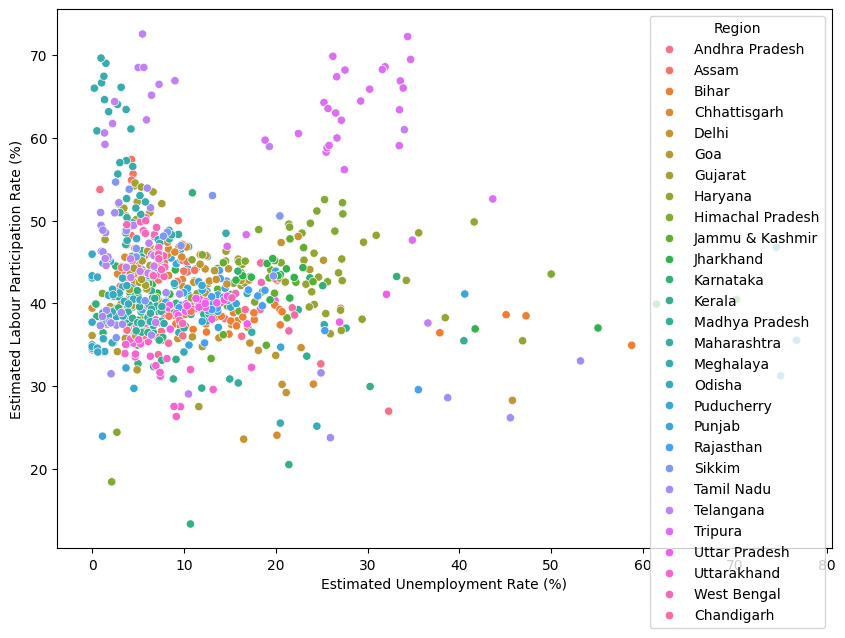

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df1, x="Estimated Unemployment Rate (%)", y="Estimated Labour Participation Rate (%)", hue="Region")
plt.show()

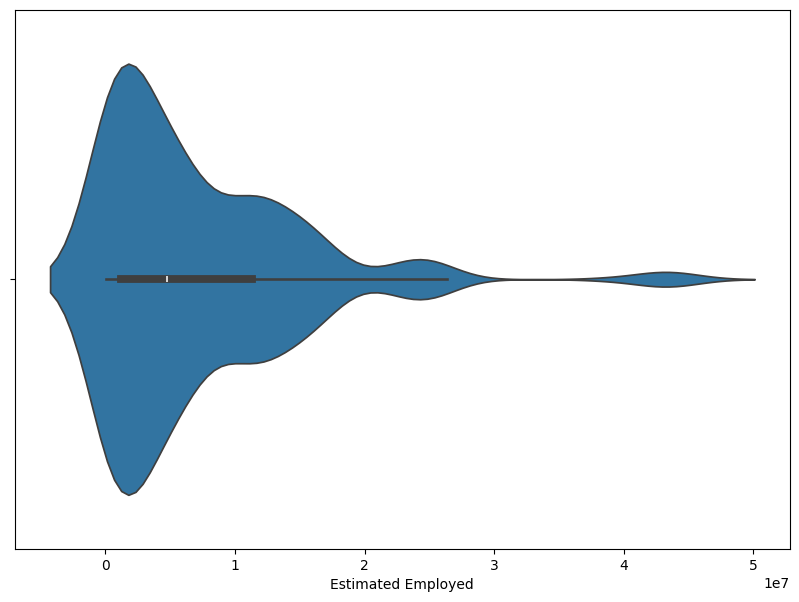

In [ ]:
plt.figure(figsize=(10,7))
sns.violinplot(x=df1["Estimated Employed"])
plt.show()


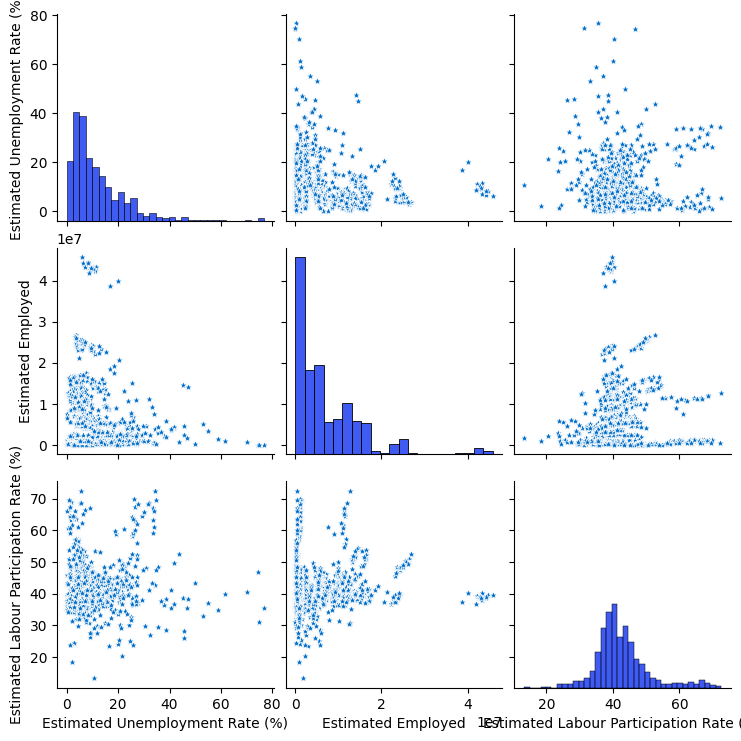

In [ ]:
# Select the columns for the pair plot
pair = df1[["Estimated Unemployment Rate (%)", "Estimated Employed", "Estimated Labour Participation Rate (%)"]]

# Create the pair plot with a custom color palette
sns.set_palette("winter")  # Set the color palette globally
sns.pairplot(pair, markers="*", plot_kws={'color': sns.color_palette("winter")[2]})  # Apply the winter palette color

plt.show()

In [ ]:
df1["Area"].value_counts()

,count
Area,
Urban,381
Rural,359


<ipython-input-33-d3f77cb2f18c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Area", data=df1, palette="Set2")  # Use a different palette like "Set2", "husl", "bright"


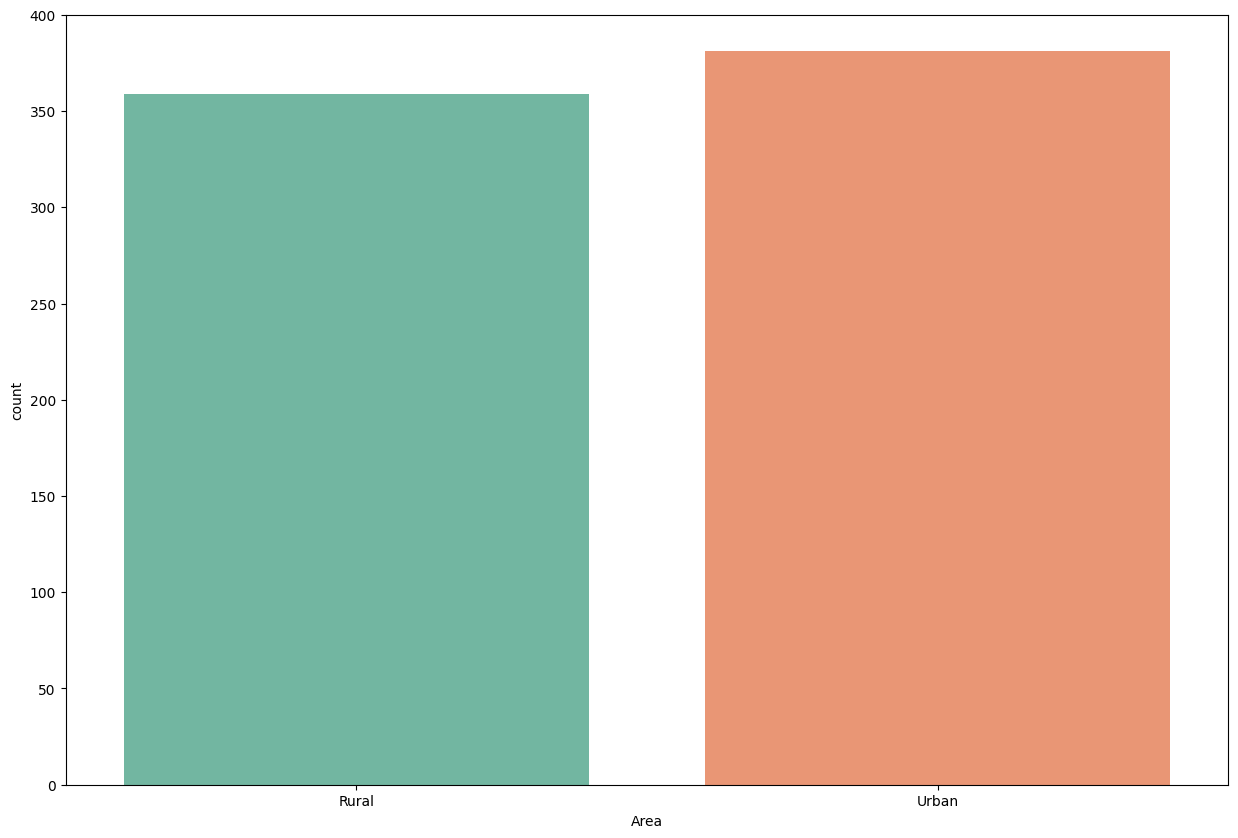

In [ ]:
# prompt: sns.countplot(x="Area",data=df1)
# plt.show() ,color it differently

plt.figure(figsize=(15, 10))
sns.countplot(x="Area", data=df1, palette="Set2")  # Use a different palette like "Set2", "husl", "bright"
plt.show()

In [ ]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df2.shape

(267, 9)

In [ ]:
df2.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [ ]:
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
#remove leading and trailing spaces from the column names
df2.columns = df2.columns.str.strip()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


<ipython-input-48-4a1dc0f0f839>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Region", data=df1, palette="viridis")  # You can also try "coolwarm", "Blues", "Set2", etc.


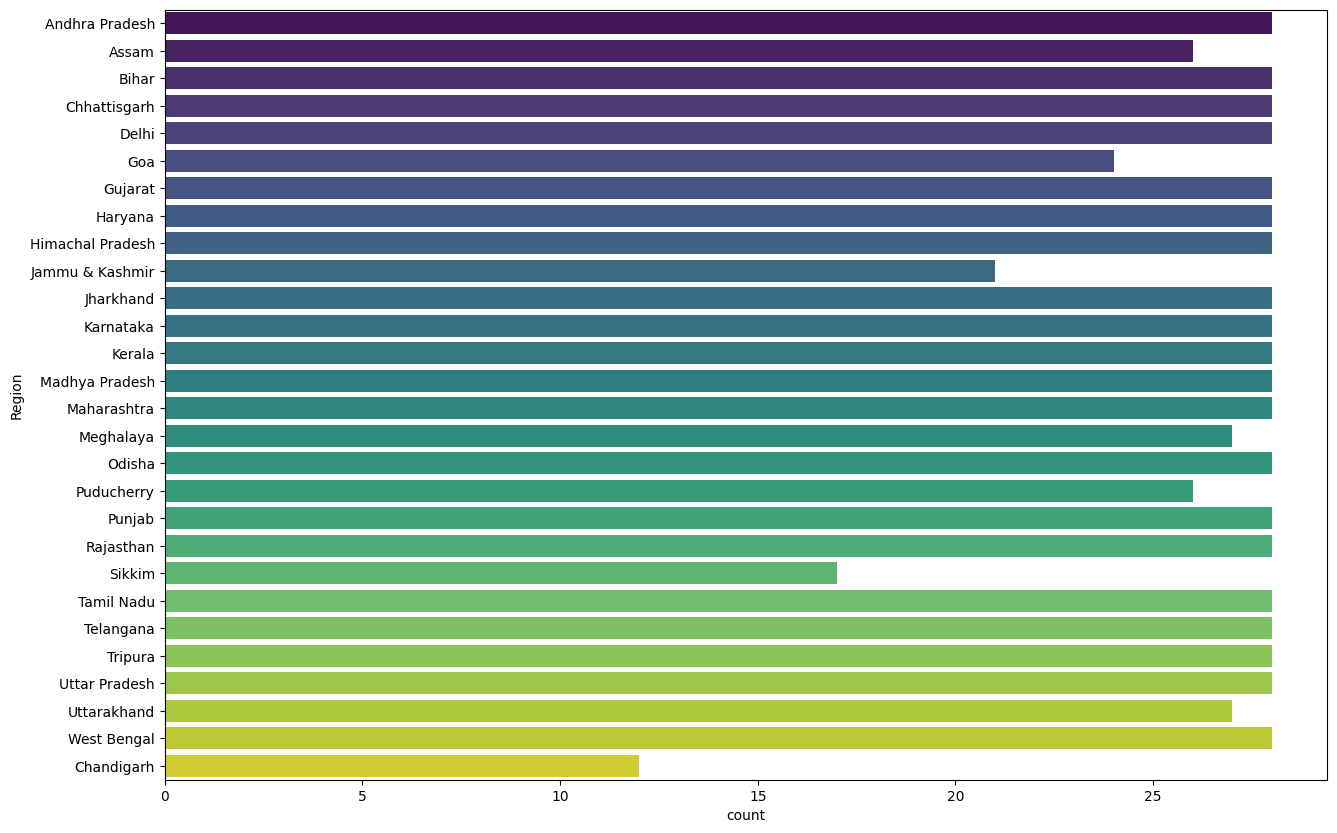

state  with  high employment : Tripura
high employment rate : 28.350357142857142
state  with  low employment : Meghalaya
low employment rate : 4.7988888888888885


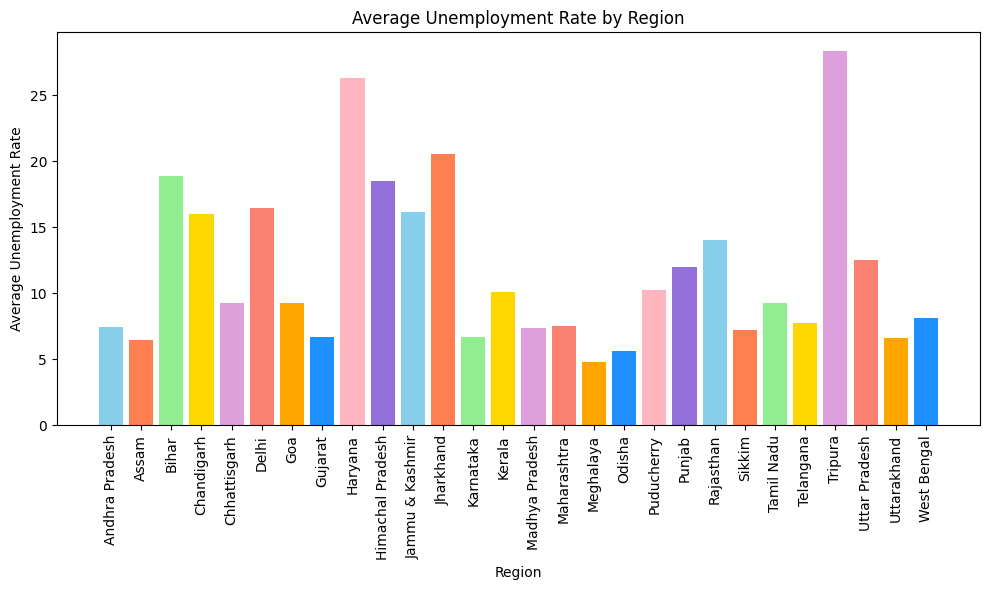

<ipython-input-48-4a1dc0f0f839>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df1,palette="Set1")


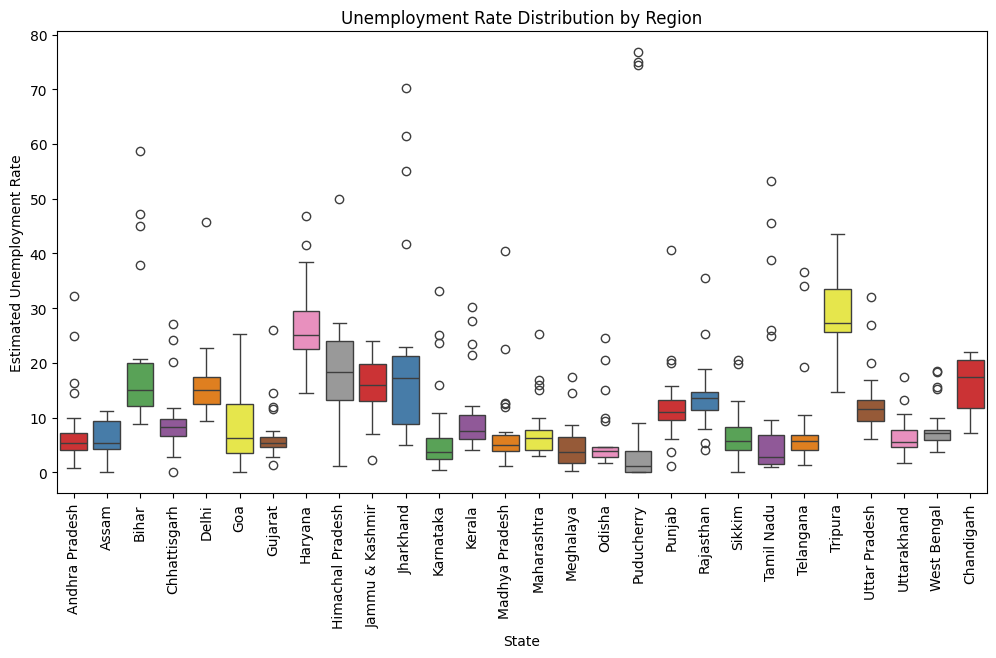

<ipython-input-48-4a1dc0f0f839>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Estimated Labour Participation Rate (%)', data=df1,palette="hsv")


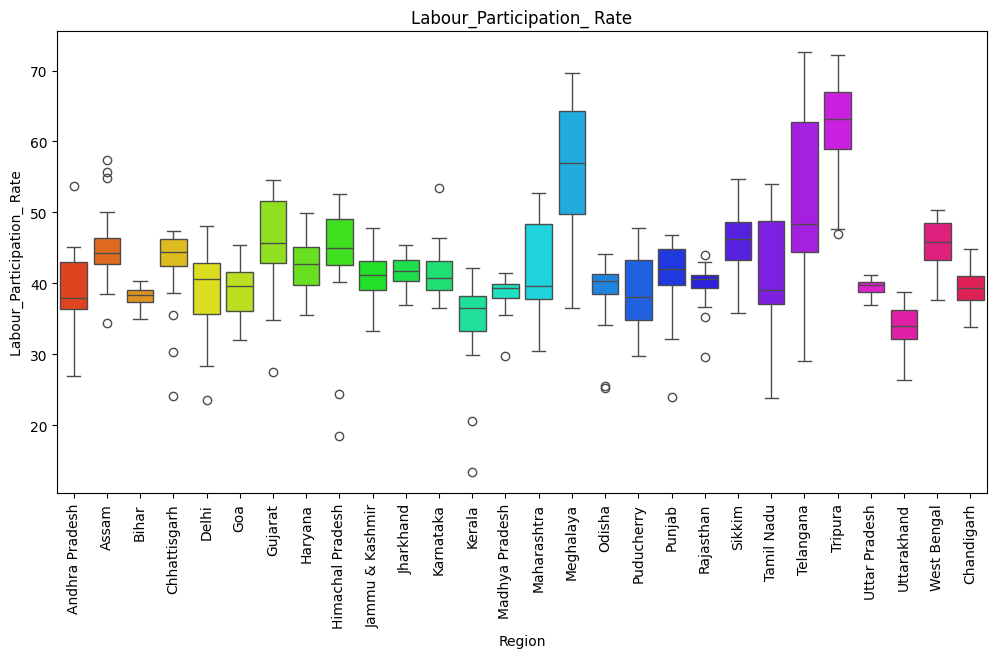

<ipython-input-48-4a1dc0f0f839>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Estimated Employed', data=df1,palette="brg")


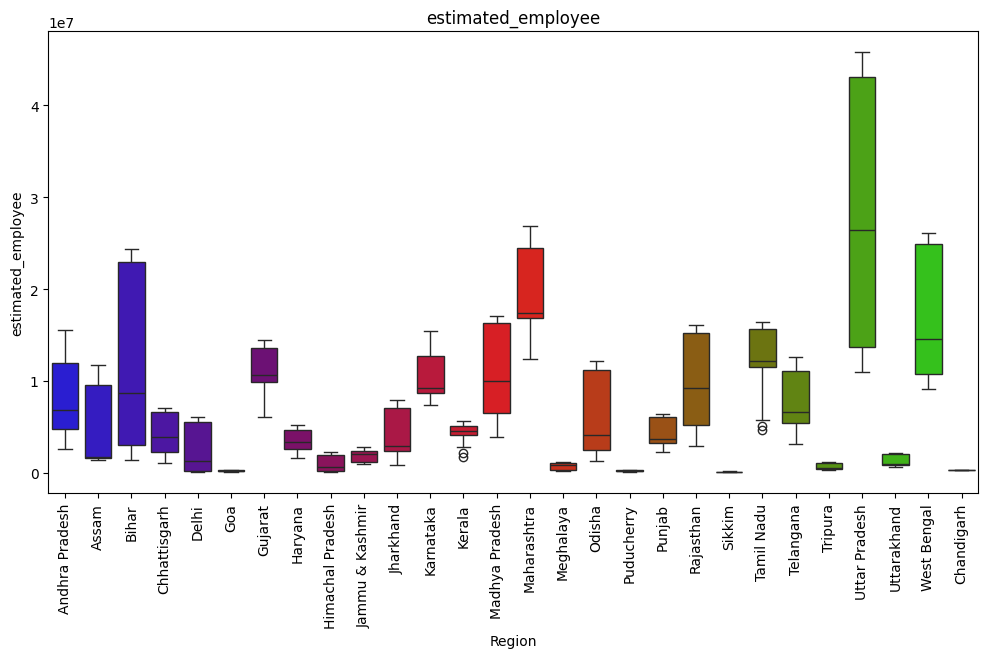

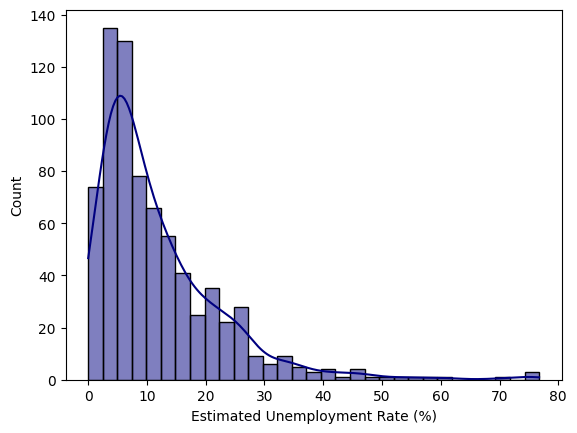

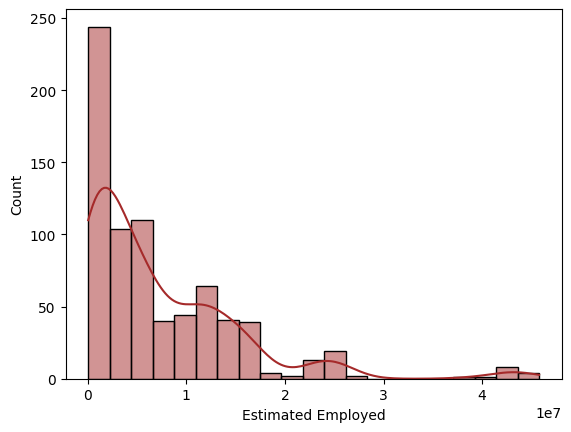

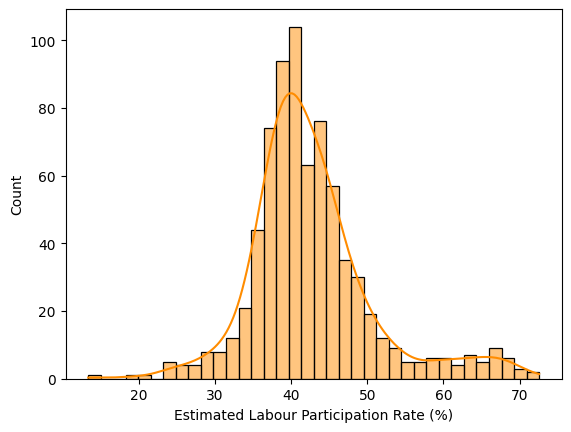

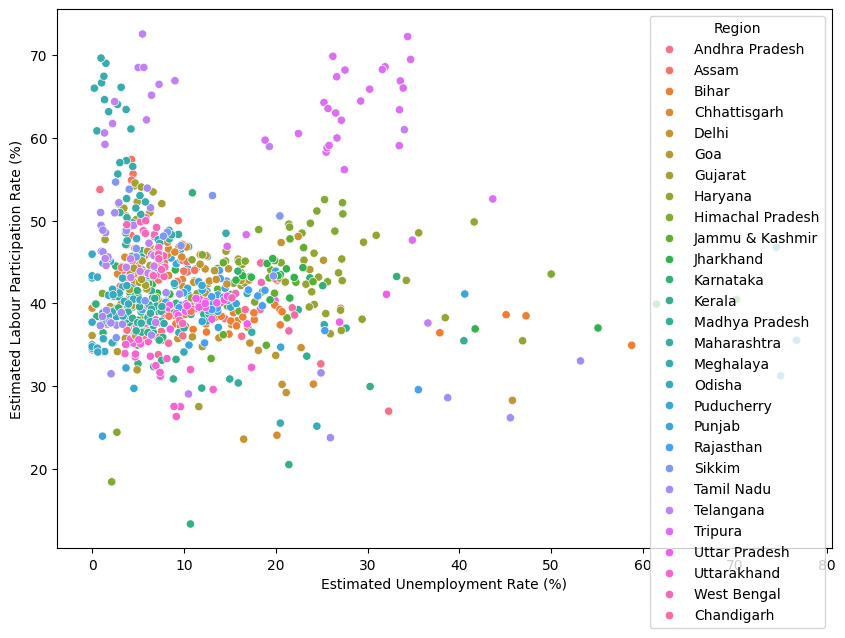

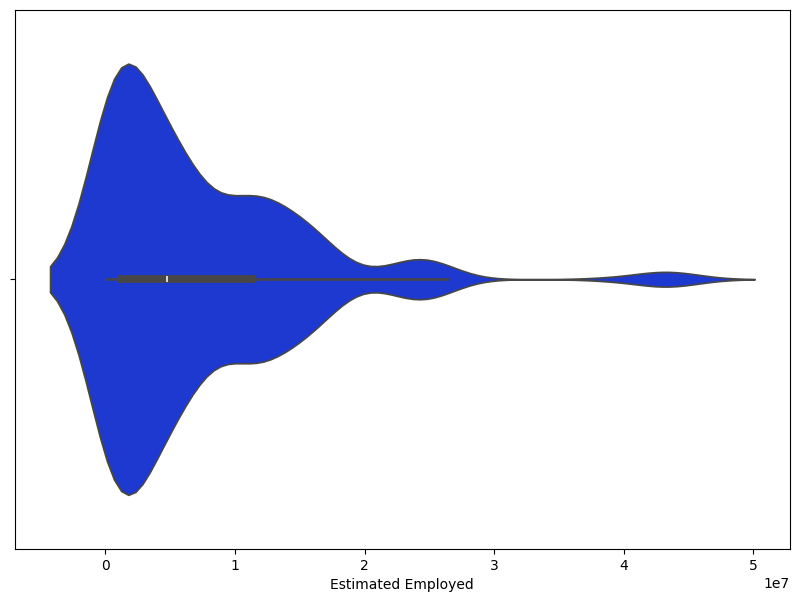

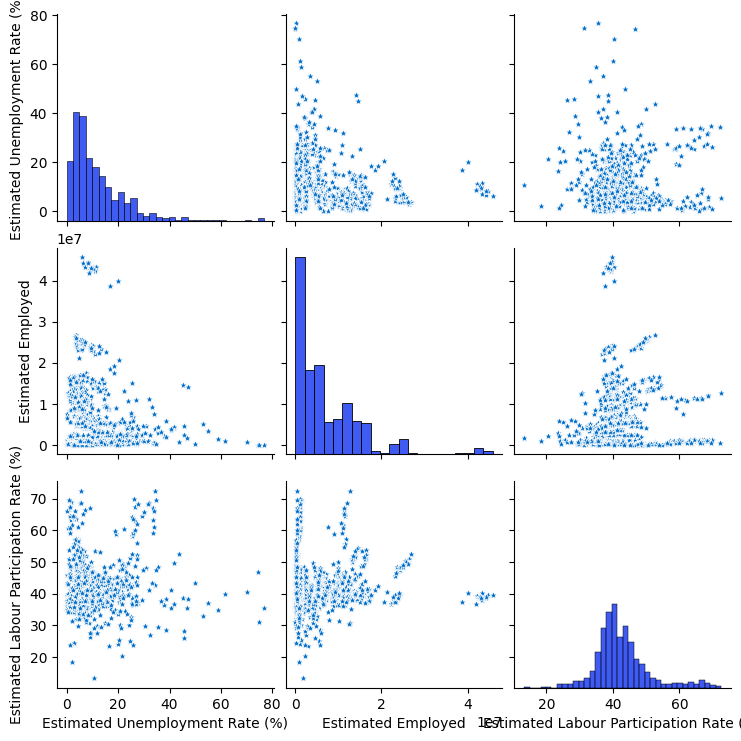

<ipython-input-48-4a1dc0f0f839>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Area", data=df1, palette="Set2")  # Use a different palette like "Set2", "husl", "bright"


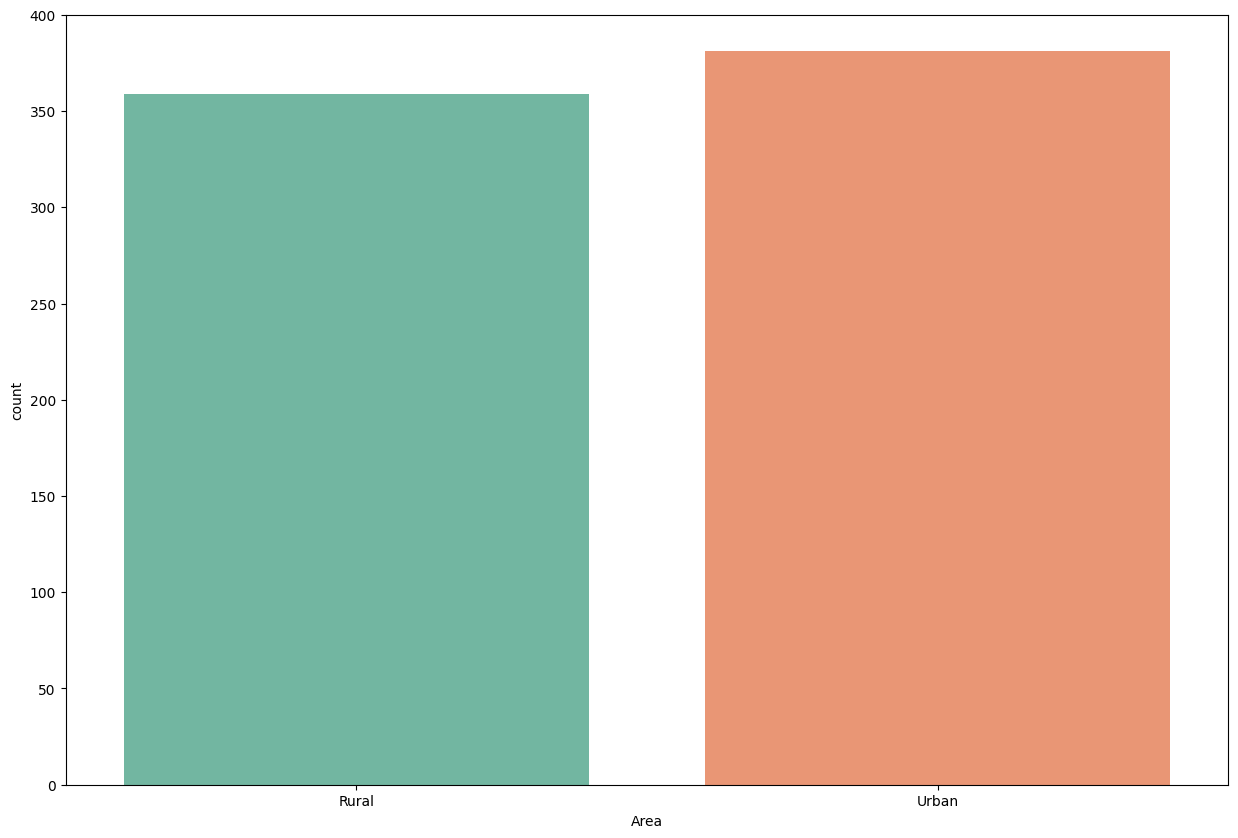

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


<ipython-input-48-4a1dc0f0f839>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Region", data=df2, palette="magma") # Use a different palette like "magma", "rocket", "viridis"


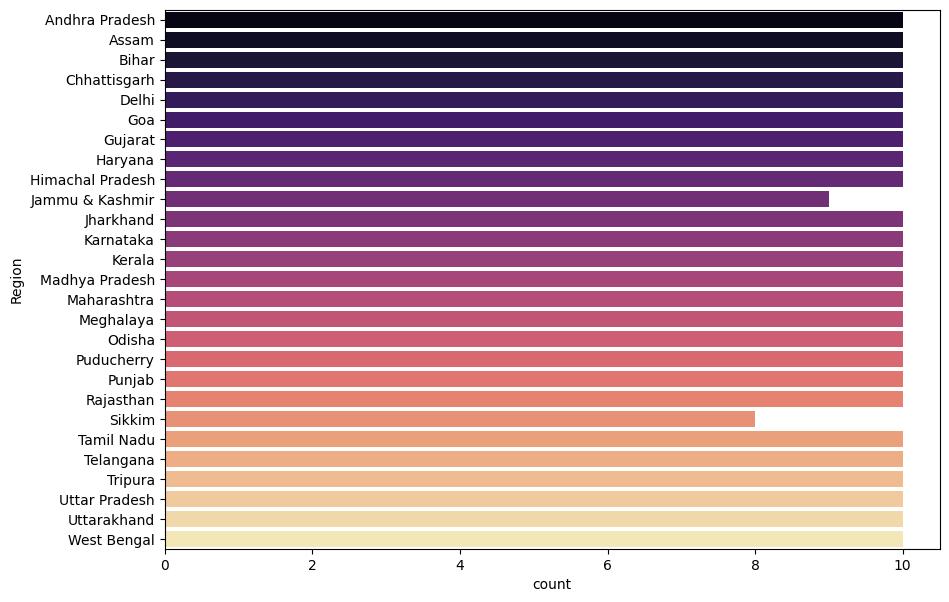

In [ ]:
# prompt: color it differently :plt.figure(figsize=(10,7))
# sns.countplot(y="Region",data=df2)
# plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df1=pd.read_csv("Unemployment in India.csv")
df2=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df1.head()
df1.columns
df1.info()
df1.isnull().sum()
df1.shape
df1.describe()
#remove leading and trailing spaces from the column names
df1.columns = df1.columns.str.strip()
df1["Estimated Unemployment Rate (%)"]

plt.figure(figsize=(15, 10))
sns.countplot(y="Region", data=df1, palette="viridis")  # You can also try "coolwarm", "Blues", "Set2", etc.
plt.show()

avg_unemployment_rate=df1.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
state_with_highest_unemployment=avg_unemployment_rate.idxmax()
high_unemployment_rate=avg_unemployment_rate.max()
state_with_lowest_unemployment=avg_unemployment_rate.idxmin()
low_unemploy_rate=avg_unemployment_rate.min()
print(f"state  with  high employment : {state_with_highest_unemployment}")
print(f"high employment rate : {high_unemployment_rate}")
print(f"state  with  low employment : {state_with_lowest_unemployment}")
print(f"low employment rate : {low_unemploy_rate}")
avg_unemployment_rate

# Assuming 'regions' and 'avg_rates' are already defined
regions = avg_unemployment_rate.index
avg_rates = avg_unemployment_rate.values

# Define a list of colors, one for each region
colors = ['skyblue', 'coral', 'lightgreen', 'gold', 'plum', 'salmon', 'orange', 'dodgerblue', 'lightpink', 'mediumpurple']

# If there are more regions than colors, this will cycle through the colors
plt.figure(figsize=(10, 6))
plt.bar(regions, avg_rates, color=colors[:len(regions)])
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df1,palette="Set1")
plt.title("Unemployment Rate Distribution by Region")
plt.xlabel("State")
plt.ylabel("Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Labour Participation Rate (%)', data=df1,palette="hsv")
plt.title("Labour_Participation_ Rate")
plt.xlabel("Region")
plt.ylabel("Labour_Participation_ Rate")
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Employed', data=df1,palette="brg")
plt.title("estimated_employee")
plt.xlabel("Region")
plt.ylabel("estimated_employee")
plt.xticks(rotation=90)
plt.show()
sns.histplot(data=df1, x="Estimated Unemployment Rate (%)", kde=True,color="navy")
plt.show()
sns.histplot(data=df1, x="Estimated Employed", kde=True,color="brown")
plt.show()
sns.histplot(data=df1, x="Estimated Labour Participation Rate (%)", kde=True,color="darkorange")
plt.show()

plt.figure(figsize=(10,7))
sns.scatterplot(data=df1, x="Estimated Unemployment Rate (%)", y="Estimated Labour Participation Rate (%)", hue="Region")
plt.show()
plt.figure(figsize=(10,7))
sns.violinplot(x=df1["Estimated Employed"])
plt.show()

# Select the columns for the pair plot
pair = df1[["Estimated Unemployment Rate (%)", "Estimated Employed", "Estimated Labour Participation Rate (%)"]]

# Create the pair plot with a custom color palette
sns.set_palette("winter")  # Set the color palette globally
sns.pairplot(pair, markers="*", plot_kws={'color': sns.color_palette("winter")[2]})  # Apply the winter palette color

plt.show()
df1["Area"].value_counts()

plt.figure(figsize=(15, 10))
sns.countplot(x="Area", data=df1, palette="Set2")  # Use a different palette like "Set2", "husl", "bright"
plt.show()
df2.head()
df2.shape
df2.isnull().sum()
df2.columns
#remove leading and trailing spaces from the column names
df2.columns = df2.columns.str.strip()
df2.info()
df2.describe()

plt.figure(figsize=(10,7))
sns.countplot(y="Region", data=df2, palette="magma") # Use a different palette like "magma", "rocket", "viridis"
plt.show()

In [ ]:
import plotly.express as px
fig = px.bar(df2, x="Region", y="Estimated Employed", title="Estimated Employed",
             animation_frame='Date',template='plotly',color="Region.1")
fig.show()

In [ ]:
fig = px.bar(df2, x="Region", y="Estimated Unemployment Rate (%)", title="unemployee rate 2020",
             animation_frame='Date',template='plotly',color="Region")
fig.show()


In [ ]:
fig = px.bar(df2, x="Region", y="Estimated Labour Participation Rate (%)", title="labour_rate 2020",
             animation_frame='Date',template='plotly',color="Region.1")
fig.show()

In [ ]:
fig = px.line(df2, x='Date', y="Estimated Unemployment Rate (%)", color='Region.1',
                    title='Unemployment Rate Over Time', template='plotly')
fig.show()

In [ ]:
# prompt: avg_unemployment = df2.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
# bar_plot = px.bar(avg_unemployment, x='Region', y='Estimated Unemployment Rate (%)',
#                    title='Average Unemployment Rate by Region', template='plotly')
# bar_plot.show() color it

avg_unemployment = df2.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
bar_plot = px.bar(avg_unemployment, x='Region', y='Estimated Unemployment Rate (%)',
                   title='Average Unemployment Rate by Region', template='plotly', color='Region')
bar_plot.show()

In [ ]:
# prompt: avg_unemployment = df2.groupby('Region')['Estimated Labour Participation Rate (%)'].mean().reset_index()
# bar_plot = px.bar(avg_unemployment, x='Region', y='Estimated Labour Participation Rate (%)',
#                    title='Average labour Rate by Region', template='plotly')
# bar_plot.show() ,clor it

avg_unemployment = df2.groupby('Region')['Estimated Labour Participation Rate (%)'].mean().reset_index()
bar_plot = px.bar(avg_unemployment, x='Region', y='Estimated Labour Participation Rate (%)',
                   title='Average labour Rate by Region', template='plotly', color='Region')
bar_plot.show()

In [ ]:
fig = px.scatter(df2, x='Estimated Employed', y='Estimated Unemployment Rate (%)',
                          color='Region.1', title='Unemployment Rate vs. Estimated Employed',animation_frame="Date")
fig.show()

In [ ]:
fig = px.scatter(df2, x='Region.1', y='Estimated Labour Participation Rate (%)',
                          color='Region.1', title='Region.1 vs labour rate',animation_frame="Date")
fig.show()

In [ ]:
fig = px.histogram(df2, x='Estimated Labour Participation Rate (%)', color='Region.1',
                         title='Distribution of Labour Participation Rate by Region', template='plotly')
fig.show()

In [ ]:
fig = px.histogram(df2, x='Estimated Employed', color='Region.1',
                         title='Distribution of Labour Participation Rate by Region', template='plotly')
fig.show()

In [ ]:
df2["Region.1"].value_counts()

,count
Region.1,
North,79
South,60
West,50
East,40
Northeast,38


<ipython-input-64-89b957533a75>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




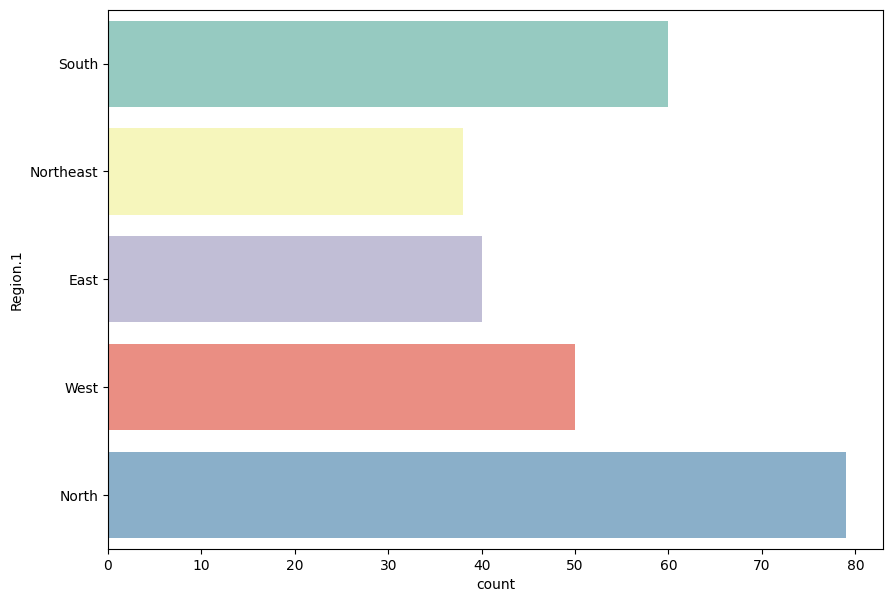

In [ ]:
# prompt: sns.countplot(y="Region.1",data=df2)
# plt.show() color it

plt.figure(figsize=(10,7))
sns.countplot(y="Region.1", data=df2, palette="Set3") # Use a different palette like "Set3", "Paired", "Accent"
plt.show()